# Data Visualization Practice

The goal of this notebook is to practice visualizing data. We will be using the Life Expectancy dataset from Kaggle ([link to dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who.)). The dataset contains data on life expectancy for multiple countries from 2000 to 2015 along with contributing factors.

There are 7 tasks for you to complete in this notebook. For each task you will be asked to determine the appropriate visual for the given scenario, create a basic visualization, and finally add style to it.

In order to format the data properly for visualizations, we need to use Pandas. The Pandas coding has been provided to you as the focus of this notebook is on creating compelling visuals. Though you will not be writing the pandas code used to format the data, this is a good chance to start thinking about how you would structure/aggregate a dataset to make appropriate visualizations.

### Visualization Tasks:
- Distribution of world-wide life expectancy
- Distribution of life expectancy for developed vs developing countries
- Ten countries with highest average life expectancy in 2015
- Average world-wide life expectancy over 15-year period
- Distribution of world-wide life expectancy for each year in 15-year period
- Correlation between years of schooling and life expectancy
- Life expectancy over 15-year period for 3 countries with highest average life expectancy and 3 countries with lowest average life expectancy

In [1]:
# IMPORT PANDAS AND PREPARE DATASET
import pandas as pd
import numpy as np

# READ IN DATASET
df = pd.read_csv('./data/life-expectancy.csv')

# CLEAN COLUMN NAMES
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# DROP MISSING VALUES
df = df.dropna(subset=['life_expectancy', 'bmi', 'schooling'])

# DISPLAY DATAFRAME
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.shape

(2736, 22)

In [3]:
df['status'].value_counts()

Developing    2272
Developed      464
Name: status, dtype: int64

# Task 0: Start by importing matplotlib using the standard alias.

In [4]:
# IMPORT MATPLOTLIB USING STANDARD ALIAS
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Distribution of world-wide life expectancy

Possible Visuals:
- Histogram
- Box & Whisker Plot

In [5]:
# PANDAS CODE
life_expectancy = df['life_expectancy']
life_expectancy

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life_expectancy, Length: 2736, dtype: float64

In [6]:
mean_life_expectancy = np.mean(life_expectancy)
median_life_expectancy = np.median(life_expectancy)

print('Mean Life Expectancy: ', mean_life_expectancy)
print('Median Life Expectancy: ', median_life_expectancy)

Mean Life Expectancy:  69.48406432748538
Median Life Expectancy:  72.3


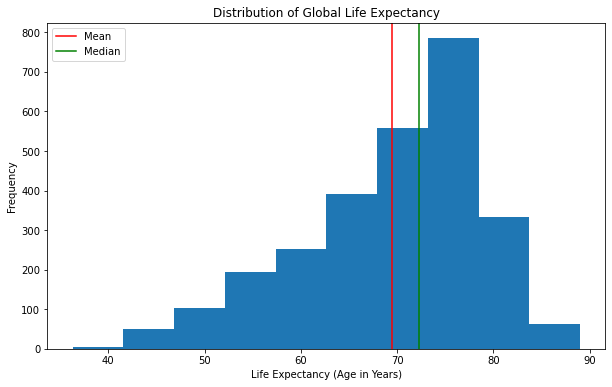

In [7]:
# Histogram showing distribution of world-wide life expectancy

# Create figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Use ax variable to plot the data
ax.hist(life_expectancy)

# Add title
ax.set_title('Distribution of Global Life Expectancy')
# Add x label
ax.set_xlabel('Life Expectancy (Age in Years)')
# Add y label
ax.set_ylabel('Frequency')

# Show Mean and Median using vertical lines
ax.axvline(mean_life_expectancy, color='red')
ax.axvline(median_life_expectancy, color='green')

# Add legend
ax.legend(['Mean', 'Median'], loc='upper left');

## Task 2: Distribution of life expectancy for developed vs developing countries

Appropriate Visuals:
- Histogram
- Box & Whisker Plot

In [8]:
# PANDAS CODE
life_expectancy_developed = df[df['status'] == 'Developed']['life_expectancy']
life_expectancy_developing = df[df['status'] == 'Developing']['life_expectancy']

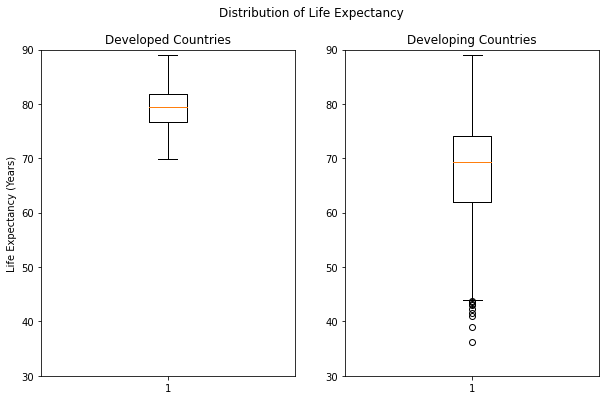

In [9]:
# Plot distributions on 2 separate axes

fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

# Distribution of life expectancy in developed countries
ax[0].boxplot(life_expectancy_developed)
ax[0].set_ylim(30, 90)
ax[0].set_title('Developed Countries')
ax[0].set_ylabel('Life Expectancy (Years)')

# Distribution of life expectancy in developin countries
ax[1].boxplot(life_expectancy_developing)
ax[1].set_title('Developing Countries')
ax[1].set_ylim(30, 90)

fig.suptitle('Distribution of Life Expectancy');

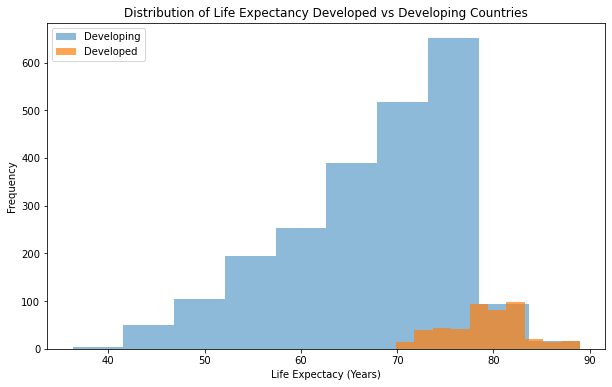

In [10]:
# Plot histogram of both distributions on same axis

fig, ax = plt.subplots(figsize=(10, 6))

# Plot both distributions
ax.hist(life_expectancy_developing, alpha=.5)
ax.hist(life_expectancy_developed, alpha=.7)

# Add title and labels
ax.set_title('Distribution of Life Expectancy Developed vs Developing Countries')
ax.set_xlabel('Life Expectacy (Years)')
ax.set_ylabel('Frequency')

# Add legend
ax.legend(['Developing', 'Developed'], loc='upper left');

## Task 3: Ten countries with highest average life expectancy in 2015

In [11]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
# PANDAS CODE
df_2015 = df[df['year'] == 2015]
top_10 = dict(df_2015[['country', 'life_expectancy']].sort_values(by='life_expectancy', ascending=False)[:10].values)
top_10

{'Slovenia': 88.0,
 'Denmark': 86.0,
 'Chile': 85.0,
 'Cyprus': 85.0,
 'Japan': 83.7,
 'Switzerland': 83.4,
 'Singapore': 83.1,
 'Spain': 82.8,
 'Australia': 82.8,
 'Italy': 82.7}

In [13]:
type(top_10.keys())

dict_keys

In [14]:
country_names = list(top_10.keys())
country_life_expectancy = list(top_10.values())

In [15]:
# Programmatically set color of bars
['b' if le > 85 else 'gray' for le in country_life_expectancy]

['b', 'b', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray']

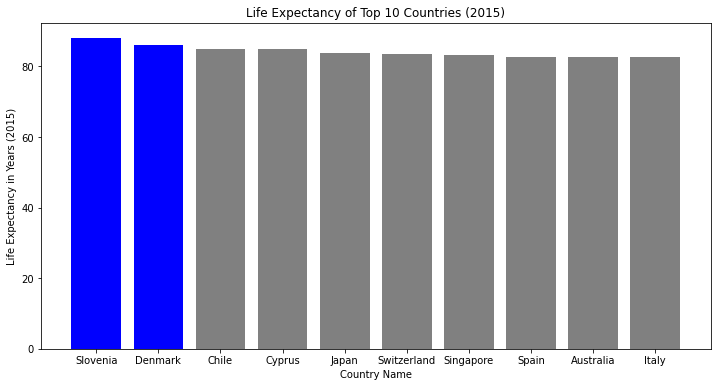

In [16]:
# Your code here

fig, ax = plt.subplots(figsize=(12, 6))

# Plot top ten countries
ax.bar(x=country_names, height=country_life_expectancy, 
           color=['b' if le > 85 else 'gray' for le in country_life_expectancy])

# Add title and axis labels
ax.set_title('Life Expectancy of Top 10 Countries (2015)')
ax.set_xlabel('Country Name')
ax.set_ylabel('Life Expectancy in Years (2015)');

## Task 4: Average world-wide life expectancy over 15-year period

In [17]:
# PANDAS CODE
avg_per_year = df.groupby('year').mean()['life_expectancy'].to_dict()
avg_per_year

{2000: 67.05614035087721,
 2001: 67.42105263157895,
 2002: 67.61052631578944,
 2003: 67.65380116959065,
 2004: 67.93625730994152,
 2005: 68.47777777777775,
 2006: 68.97192982456141,
 2007: 69.33625730994152,
 2008: 69.68538011695907,
 2009: 70.20643274853802,
 2010: 70.29005847953215,
 2011: 70.88070175438598,
 2012: 71.13333333333337,
 2013: 71.47836257309942,
 2014: 71.76549707602337,
 2015: 71.84152046783626}

Appropriate Visual:
- Line plot

In [18]:
# Your code here
years = list(avg_per_year.keys())
values = list(avg_per_year.values())

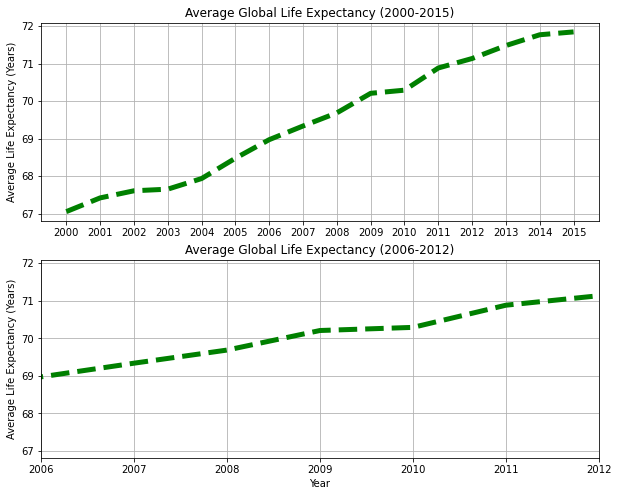

In [19]:
fig, ax = plt.subplots(figsize=(10, 8), nrows=2)

# First plot (2000-2015)
# Plot data on line graph
ax[0].plot(years, values, lw=5, ls='--', color='green');

# Add title and labels
ax[0].set_title('Average Global Life Expectancy (2000-2015)')
ax[0].set_ylabel('Average Life Expectancy (Years)')

# Change x_ticks
ax[0].set_xticks(range(2000, 2016))

# Add gridlines
ax[0].grid()

# Second Plot (2000-2006)
ax[1].plot(years, values, lw=5, ls='--', color='green');

# Add title and labels
ax[1].set_title('Average Global Life Expectancy (2006-2012)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Life Expectancy (Years)')

# Change x_ticks
ax[1].set_xticks(range(2000, 2016))

# Set xlim
ax[1].set_xlim(2006, 2012)

# Add gridlines
ax[1].grid();

## Task 5: Distribution of world-wide life expectancy for each year in 15-year period

In [20]:
# PANDAS CODE
country_expectancy_per_year = df.groupby('year')['life_expectancy'].apply(lambda x: x.values).to_dict()
country_expectancy_per_year

{2000: array([54.8, 72.6, 71.3, 45.3, 73.6, 74.1, 72. , 79.5, 78.1, 66.6, 72.6,
        74.5, 65.3, 73.3, 68. , 77.6, 68.3, 55.4, 62. , 62.6, 74.6, 47.8,
        75. , 74.4, 71.1, 51. , 58. , 69.9, 57.7, 51.4, 79.1, 46. , 47.6,
        77.3, 71.7, 71.4, 59.5, 52.9, 77.6, 74.7, 76.9, 78.1, 76.9, 57.4,
        72. , 72.8, 68.8, 69. , 52.7, 45.3, 78. , 51.2, 67.7, 77.5, 78.8,
        61. , 55.9, 71.8, 78. , 57.2, 78.2, 74. , 67.7, 52.5, 52.1, 65.4,
        58.6, 71. , 71.7, 79.7, 62.5, 66.3, 73. , 70. , 76.4, 78.9, 79.4,
        72.6, 81.1, 71.7, 63.9, 51.9, 64.1, 73.2, 66.6, 58.1, 71. , 72.7,
        49.3, 51.9, 78. , 71.6, 77.8, 57.9, 43.1, 72.4, 69.6, 49.8, 77.5,
        60. , 71. , 74.8, 67. , 62.8, 73. , 68.6, 49. , 62.1, 57.4, 62.5,
        78.1, 78.6, 73. , 50. , 47.1, 78.5, 72.6, 62.8, 75.7, 58.9, 79. ,
        71.4, 66.8, 73.7, 76.6, 76.2, 77. , 65. , 48.3, 71.6, 79. , 72. ,
        62.6, 72.6, 57.5, 72.6, 71.8, 39. , 78.3, 73. , 76. , 65.8, 57.3,
        79.1, 71.5, 67.4, 48.4, 

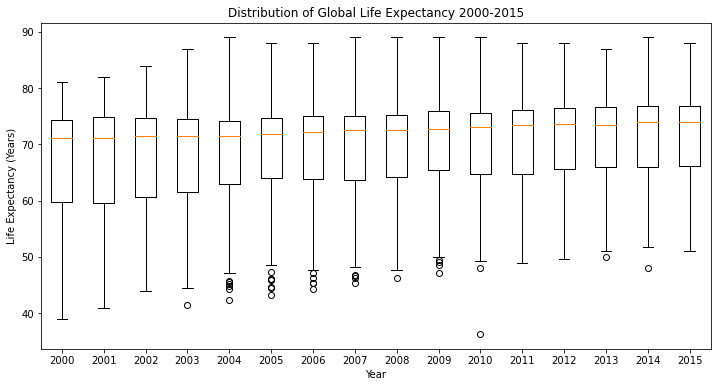

In [21]:
# Your code here
fig, ax = plt.subplots(figsize=(12,6))

ax.boxplot(country_expectancy_per_year.values(), labels=country_expectancy_per_year.keys());

# Add title and labels
ax.set_title('Distribution of Global Life Expectancy 2000-2015')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy (Years)');

## Task 6: Correlation between years of schooling and life expectancy

In [22]:
# PANDAS CODE
# We have life_expectancy list from earlier in notebook
years_of_schooling = df['schooling']

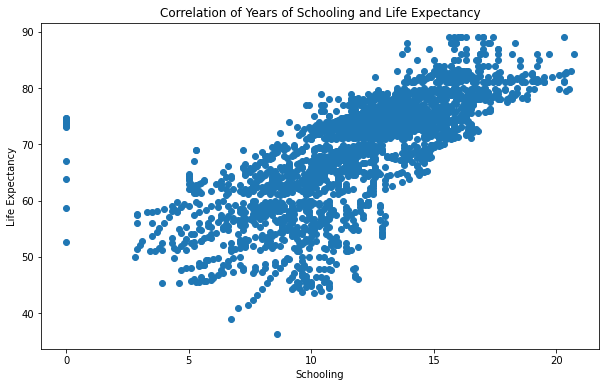

In [23]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(years_of_schooling, life_expectancy)

# Add title and labels
ax.set_title('Correlation of Years of Schooling and Life Expectancy')
ax.set_xlabel('Schooling')
ax.set_ylabel('Life Expectancy');

## Task 7: Life expectancy over 15-year period for 3 countries with highest average life expectancy and 3 countries with lowest average life expectancy

In [24]:
# PANDAS CODE
top_3_country_names = list(df.groupby('country').mean()['life_expectancy'].sort_values(ascending=False).index[:3])
low_3_country_names = list(df.groupby('country').mean()['life_expectancy'].sort_values(ascending=False).index[-3:])

country_expectancies_per_year = []
for country in top_3_country_names:
    d = {}
    d['name'] = country
    d['yearly_expectancies'] = dict(df[df['country'] == country][['year', 'life_expectancy']].sort_values(by='year').values)
    country_expectancies_per_year.append(d)
for country in low_3_country_names:
    d = {}
    d['name'] = country
    d['yearly_expectancies'] = dict(df[df['country'] == country][['year', 'life_expectancy']].sort_values(by='year').values)
    country_expectancies_per_year.append(d)

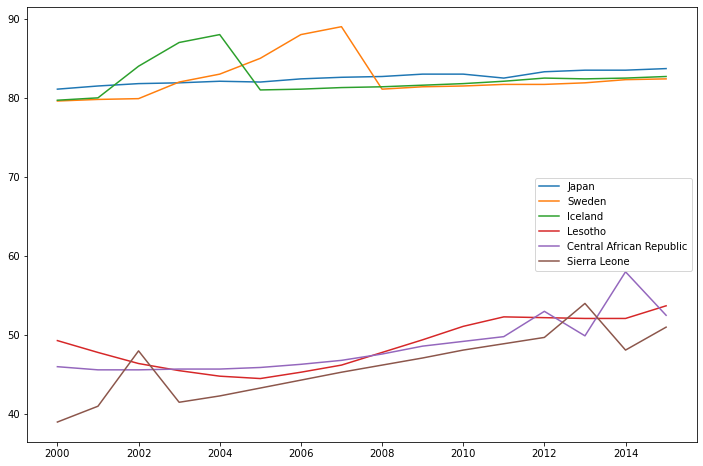

In [25]:
# OPTION 1 - ALL IN ONE PLOT
fig, ax = plt.subplots(figsize=(12, 8))
for country in country_expectancies_per_year:
    yearly_expectancies = country['yearly_expectancies']
    ax.plot(yearly_expectancies.keys(), yearly_expectancies.values())
ax.legend([country['name'] for country in country_expectancies_per_year]);

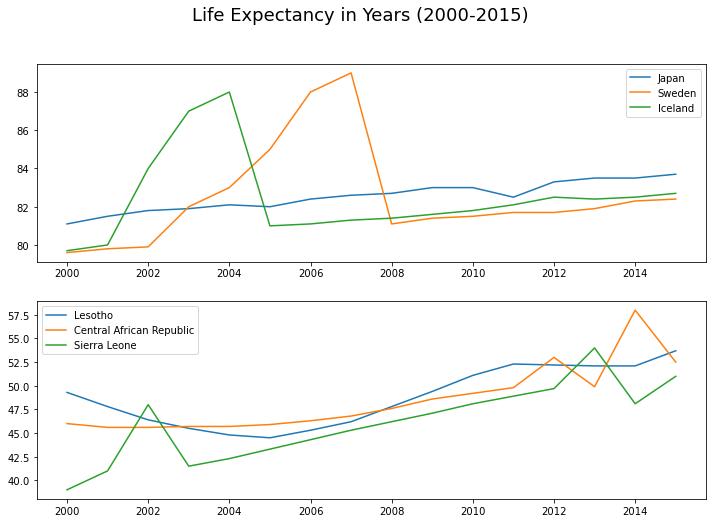

In [26]:
# OPTION 2 - One plot for top 3 countries and one plot for low 3 countries
fig, ax = plt.subplots(figsize=(12, 8), nrows=2)

for country in country_expectancies_per_year[:3]:
    yearly_expectancies = country['yearly_expectancies']
    ax[0].plot(yearly_expectancies.keys(), yearly_expectancies.values())
    
for country in country_expectancies_per_year[3:]:
    yearly_expectancies = country['yearly_expectancies']
    ax[1].plot(yearly_expectancies.keys(), yearly_expectancies.values())
    
ax[0].legend([country['name'] for country in country_expectancies_per_year[:3]])
ax[1].legend([country['name'] for country in country_expectancies_per_year[3:]])

fig.suptitle('Life Expectancy in Years (2000-2015)', fontsize=18);

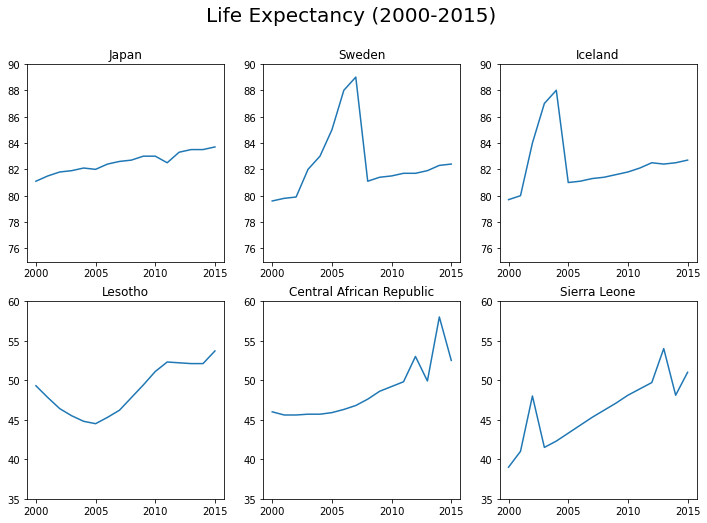

In [27]:
# OPTION 3 - Different Plot for Each Country
nrows = 2
ncols = 3
fig, ax = plt.subplots(figsize=(12,8), nrows=nrows, ncols=ncols)

country_num = 0
for row in range(nrows):
    for col in range(ncols):
        country = country_expectancies_per_year[country_num]
        name = country['name']
        yearly_expectancies = country['yearly_expectancies']
        ax[row, col].plot(yearly_expectancies.keys(), yearly_expectancies.values())
        ax[row, col].set_title(name)
        if row == 0: # Set ylim for each row separately
            ax[row, col].set_ylim(75, 90)
        else:
            ax[row, col].set_ylim(35, 60)
        country_num += 1
        
# Add title and labels to entire figure
fig.suptitle('Life Expectancy (2000-2015)', fontsize=20);